# Plot and ScatterPlot review and practice

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# For compatibility across multiple platforms
import os
IB = os.environ.get('INSTABASE_URI',None) is not None
open = ib.open if IB else open

### Plotting from Python data structures

In [3]:
# Read Cities.csv and Countries.csv into lists of dictionaries
citiesList = []
with open('Cities.csv') as f:
    rows = csv.DictReader(f)
    for r in rows:
        citiesList.append(r)
countriesList = []
with open('Countries.csv') as f:
    rows = csv.DictReader(f)
    for r in rows:
        countriesList.append(r)

In [4]:
citiesList[0:3]

[{'city': 'Aalborg',
  'country': 'Denmark',
  'latitude': '57.03',
  'longitude': '9.92',
  'temperature': '7.52'},
 {'city': 'Aberdeen',
  'country': 'United Kingdom',
  'latitude': '57.17',
  'longitude': '-2.08',
  'temperature': '8.10'},
 {'city': 'Abisko',
  'country': 'Sweden',
  'latitude': '63.35',
  'longitude': '18.83',
  'temperature': '0.20'}]

In [5]:
countriesList[0:3]

[{'country': 'Albania', 'population': '2.9', 'EU': 'no', 'coastline': 'yes'},
 {'country': 'Andorra', 'population': '0.07', 'EU': 'no', 'coastline': 'no'},
 {'country': 'Austria', 'population': '8.57', 'EU': 'yes', 'coastline': 'no'}]

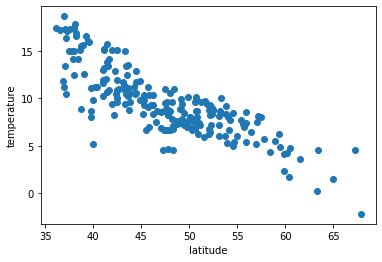

In [6]:
# Scatterplot of temperature (y) versus latitude (x)
x = []
y = []
for city in citiesList:
    x.append(float(city['latitude']))
    y.append(float(city['temperature']))
plt.scatter(x, y)
# Add labels to axes
plt.xlabel('latitude')
plt.ylabel('temperature')
plt.show()

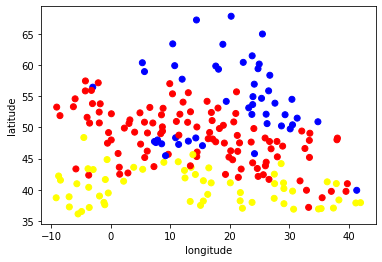

In [7]:
# Scatterplot of latitude (y) versus longitude (x) colored by temperature
x = []
y = []
colors = []
for city in citiesList:
    x.append(float(city['longitude']))
    y.append(float(city['latitude']))
    if float(city['temperature']) < 7:
        colors.append('blue')
    elif float(city['temperature']) < 11:
        colors.append('red')
    else: colors.append('yellow')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.scatter(x, y, c=colors)
plt.show()

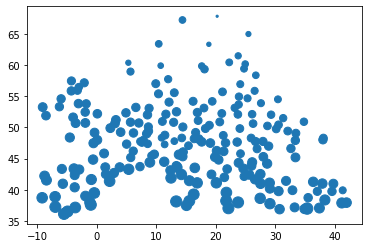

In [8]:
# Scatterplot of latitude (y) versus longitude (x) sized by temperature
x = []
y = []
size = []
for city in citiesList:
    x.append(float(city['longitude']))
    y.append(float(city['latitude']))
    size.append((float(city['temperature'])+3)*6) # +3 to avoid negative numbers
plt.scatter(x, y, size)
plt.show()

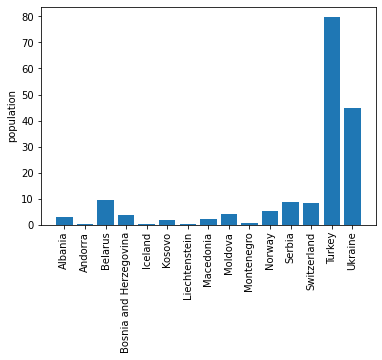

In [9]:
# Bar chart showing populations of non-EU countries
barnames = []
heights = []
for country in countriesList:
    if country['EU'] == 'no':
        barnames.append(country['country'])
        heights.append(float(country['population']))
ticks = list(range(len(barnames))) # produces [0,1,...,n-1] for n bars
# print(ticks)
plt.xticks(ticks, barnames, rotation='vertical')
plt.bar(ticks, heights)
plt.ylabel('population')
plt.show()

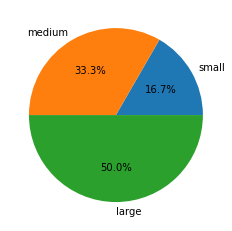

In [10]:
# Introduction to pie charts
sizes = [10, 20, 30]
lbls = ['small', 'medium', 'large']
plt.pie(sizes, labels=lbls, autopct='%1.1f%%')
plt.show()

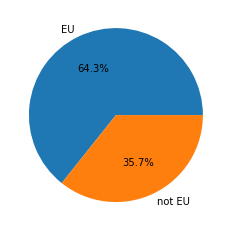

In [11]:
# Pie chart showing number of EU countries versus non-EU countries
numEU = 0
numNotEU = 0
for country in countriesList:
    if country['EU'] == 'yes': numEU += 1
    else: numNotEU +=1
plt.pie([numEU, numNotEU], labels=['EU','not EU'], autopct='%1.1f%%')
plt.show()

### Plotting from pandas dataframes

In [12]:
# Read Cities.csv and Countries.csv into dataframes
f = open('Cities.csv')
citiesDF = pd.read_csv(f)
f = open('Countries.csv')
countriesDF = pd.read_csv(f)

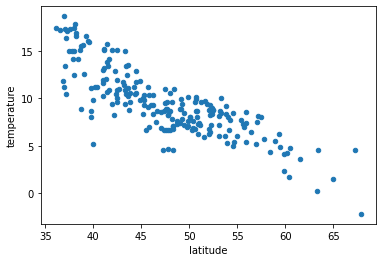

In [13]:
# Scatterplot of temperature (y) versus latitude (x)
citiesDF.plot.scatter(x='latitude', y='temperature')
plt.show()

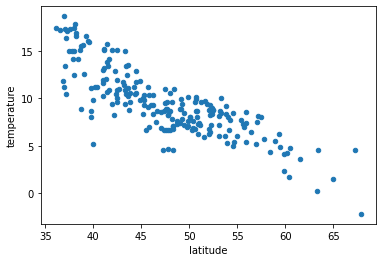

In [14]:
# Scatterplot of temperature (y) versus latitude (x)
citiesDF.plot.scatter('latitude', 'temperature')
plt.show()

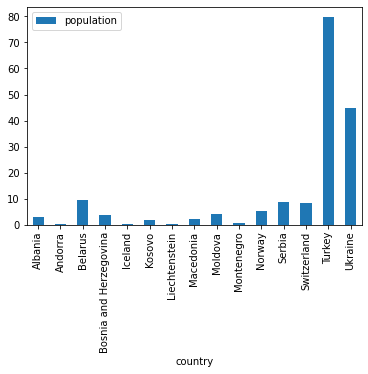

In [15]:
# Bar chart showing populations of non-EU countries
countriesDF[countriesDF.EU == 'no'].plot.bar(x='country', y='population')
plt.show()

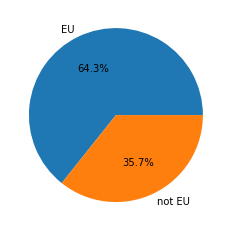

In [16]:
# Pie chart showing number of EU countries versus non-EU countries
# No convenient plotting direct from dataframe
numEU = len(countriesDF[countriesDF.EU == 'yes'])
numNotEU = len(countriesDF[countriesDF.EU == 'no'])
plt.pie([numEU, numNotEU], labels=['EU','not EU'], autopct='%1.1f%%')
plt.show()

### <font color="green">Your Turn: World Cup Data</font>

In [17]:
# Read Players.csv and Teams.csv into data structures and dataframes
# Use whichever one you prefer for plotting
# Lists of dictionaries
playersList = []
with open('Players.csv') as f:
    rows = csv.DictReader(f)
    for r in rows:
        playersList.append(r)
teamsList = []
with open('Teams.csv') as f:
    rows = csv.DictReader(f)
    for r in rows:
        teamsList.append(r)
# Dataframes
f = open('Players.csv')
playersDF = pd.read_csv(f)
f = open('Teams.csv')
teamsDF = pd.read_csv(f)

In [19]:
playersList[:3]

[{'surname': 'Abdoun',
  'team': 'Algeria',
  'position': 'midfielder',
  'minutes': '16',
  'shots': '0',
  'passes': '6',
  'tackles': '0',
  'saves': '0'},
 {'surname': 'Belhadj',
  'team': 'Algeria',
  'position': 'defender',
  'minutes': '270',
  'shots': '1',
  'passes': '146',
  'tackles': '8',
  'saves': '0'},
 {'surname': 'Boudebouz',
  'team': 'Algeria',
  'position': 'midfielder',
  'minutes': '74',
  'shots': '3',
  'passes': '28',
  'tackles': '1',
  'saves': '0'}]

In [20]:
teamsList[:2]

[{'team': 'Brazil',
  'ranking': '1',
  'games': '5',
  'wins': '3',
  'draws': '1',
  'losses': '1',
  'goalsFor': '9',
  'goalsAgainst': '4',
  'yellowCards': '7',
  'redCards': '2'},
 {'team': 'Spain',
  'ranking': '2',
  'games': '6',
  'wins': '5',
  'draws': '0',
  'losses': '1',
  'goalsFor': '7',
  'goalsAgainst': '2',
  'yellowCards': '3',
  'redCards': '0'}]

In [21]:
playersDF

,surname,team,position,minutes,shots,passes,tackles,saves
0,Abdoun,Algeria,midfielder,16,0,6,0,0
1,Belhadj,Algeria,defender,270,1,146,8,0
2,Boudebouz,Algeria,midfielder,74,3,28,1,0
3,Bougherra,Algeria,defender,270,1,89,11,0
4,Chaouchi,Algeria,goalkeeper,90,0,17,0,2
...,...,...,...,...,...,...,...,...
590,Holden,USA,midfielder,4,0,2,0,0
591,Howard,USA,goalkeeper,390,0,81,0,14
592,Jozy Altidore,USA,forward,356,8,84,2,0
593,Onyewu,USA,defender,170,1,69,2,0


In [22]:
teamsDF

,team,ranking,games,wins,draws,losses,goalsFor,goalsAgainst,yellowCards,redCards
0,Brazil,1,5,3,1,1,9,4,7,2
1,Spain,2,6,5,0,1,7,2,3,0
2,Portugal,3,4,1,2,1,7,1,8,1
3,Netherlands,4,6,6,0,0,12,5,15,0
4,Italy,5,3,0,2,1,4,5,5,0
5,Germany,6,6,4,0,2,13,3,8,1
6,Argentina,7,5,4,0,1,10,6,7,0
7,England,8,4,1,2,1,3,5,6,0
8,France,9,3,0,1,2,1,4,6,1
9,Greece,13,3,1,0,2,2,5,5,0


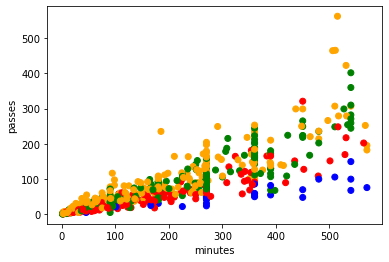

In [24]:
x = []
y = []
colors = []
for player in playersList:
    x.append(int(player['minutes']))
    y.append(int(player['passes']))
    if player['position']=='goalkeeper':
        colors.append('blue')
    elif player['position']=='defender':
        colors.append('green')
    elif player['position']=='midfielder':
        colors.append('orange')
    else: colors.append('red')
plt.xlabel('minutes')
plt.ylabel('passes')
plt.scatter(x, y, c=colors)
plt.show()

ValueError: ['blue', 'green', 'orange', 'red'] is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

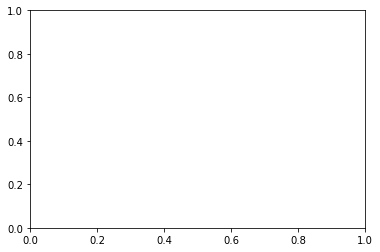

In [26]:
# Create a scatterplot of players showing passes made (y-axis)
# versus minutes played (x-axis). Color each player based on their
# position (goalkeeper, defender, midfielder, forward).
playersDF.plot.scatter('minutes', 'passes', c = 'position', colormap =['blue', 'green', 'orange', 'red'])
plt.show()

In [ ]:
# Create a bar chart showing the number of teams with 0, 1, and 2 red cards
labels = ['zero', 'one', 'two'] # number of red cards
values = [0, 0, 0] # number of teams with zero/one/two red cards
# your code here

### <font color="green">One possible implementation: World Cup Data</font>

In [ ]:
# Create a scatterplot of players showing passes made (y-axis)
# versus minutes played (x-axis). Color each player based on their
# position (goalkeeper, defender, midfielder, forward).

In [27]:
playersDF.head()

,surname,team,position,minutes,shots,passes,tackles,saves
0,Abdoun,Algeria,midfielder,16,0,6,0,0
1,Belhadj,Algeria,defender,270,1,146,8,0
2,Boudebouz,Algeria,midfielder,74,3,28,1,0
3,Bougherra,Algeria,defender,270,1,89,11,0
4,Chaouchi,Algeria,goalkeeper,90,0,17,0,2


In [37]:
playersDFpos = playersDF['position'].copy()
playersDFpos.head()

0    midfielder
1      defender
2    midfielder
3      defender
4    goalkeeper
Name: position, dtype: object

In [38]:
playersDFpos[playersDFpos=='goalkeeper'] = 0
playersDFpos[playersDFpos=='defender'] = 1
playersDFpos[playersDFpos=='midfielder'] = 2
playersDFpos[playersDFpos=='forward'] = 3
playersDFpos.head()

0    2
1    1
2    2
3    1
4    0
Name: position, dtype: object

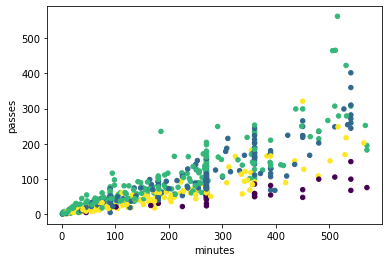

In [39]:
playersDF.plot.scatter('minutes', 'passes', c = playersDFpos, colormap = 'viridis')
plt.show()

In [ ]:
# Create a bar chart showing the number of teams with 0, 1, and 2 red cards
labels = ['zero', 'one', 'two'] # number of red cards
values = [0, 0, 0] # number of teams with zero/one/two red cards

In [32]:
teamsDF.head()

,team,ranking,games,wins,draws,losses,goalsFor,goalsAgainst,yellowCards,redCards
0,Brazil,1,5,3,1,1,9,4,7,2
1,Spain,2,6,5,0,1,7,2,3,0
2,Portugal,3,4,1,2,1,7,1,8,1
3,Netherlands,4,6,6,0,0,12,5,15,0
4,Italy,5,3,0,2,1,4,5,5,0


In [ ]:
values = len(teamsDF[teamsDF.redCards==x])

### <font color="green">Your Turn Extra: Titanic Data</font>

In [ ]:
# Read Titanic.csv into data structure and dataframe
# Use whichever one you prefer for plotting
# List of dictionaries
titanicList = []
with open('Titanic.csv') as f:
    rows = csv.DictReader(f)
    for r in rows:
        titanicList.append(r)
# Dataframe
f = open('Titanic.csv')
titanicDF = pd.read_csv(f)

In [ ]:
# For passengers in 3rd class, create a scatterplot of fare (y-axis)
# versus age (x-axis). Don't worry about missing ages.
# NOTE:'class' is a function in Pandas, so 'titanic.class' will generate
# an error; use 'titanic['class'] instead
YOUR CODE HERE

In [ ]:
# Create a bar chart showing the average fare paid by passengers in each class.
# The three bars should be labeled 'first', 'second', 'third'.
YOUR CODE HERE

In [ ]:
# Create a pie chart showing the relative number of male survivors, male
# non-survivors, female survivors, and female non-survivors (four slices).
YOUR CODE HERE

### <font color="green">One possible implementation: Titanic Data</font>

In [ ]:
# For passengers in 3rd class, create a scatterplot of fare (y-axis)
# versus age (x-axis). Don't worry about missing ages.
# NOTE:'class' is a function in Pandas, so 'titanic.class' will generate
# an error; use 'titanic['class'] instead



In [ ]:
# Create a bar chart showing the average fare paid by passengers in each class.
# The three bars should be labeled 'first', 'second', 'third'.



In [ ]:
# Create a pie chart showing the relative number of male survivors, male
# non-survivors, female survivors, and female non-survivors (four slices).



Credits: Jennifer Widom